# Part 1: 特征工程

In [1]:
import pandas as pd
import zipfile

zip_path = "Facebook.zip"
encoding_options = ['utf-8', 'latin1', 'ISO-8859-1']
all_dfs = []

with zipfile.ZipFile(zip_path, 'r') as z:
    for file_name in z.namelist():
        if file_name.endswith(".csv") and "Features" in file_name:
            for enc in encoding_options:
                try:
                    with z.open(file_name) as f:
                        df = pd.read_csv(f, encoding=enc, header=None)
                        df['source_file'] = file_name.split("/")[-1]
                        all_dfs.append(df)
                        break
                except Exception:
                    continue

combined_df = pd.concat(all_dfs, ignore_index=True)
column_names = ["Page total likes", "Type", "Category", "Post Month", "Post Weekday", "Post Hour",
    "Paid", "Lifetime Post Total Reach", "Lifetime Post Total Impressions",
    "Lifetime Engaged Users", "Lifetime Post Consumers", "Lifetime Post Consumptions",
    "Lifetime Post Impressions by people who have liked your Page",
    "Lifetime Post reach by people who like your Page",
    "Lifetime People who have liked your Page and engaged with your post",
    "comment", "like", "share", "Total Interactions",
    "Post Promotion Status", "H Local post reach", "H Local post impressions",
    "H Engaged users", "H Post consumers", "H Post consumptions",
    "H Impressions by people who have liked your Page",
    "H Reach by people who like your Page",
    "H People who have liked your Page and engaged with your post",
    "L Lifetime post total reach", "L Lifetime post total impressions",
    "L Engaged users", "L Post consumers", "L Post consumptions",
    "L Impressions by people who have liked your Page",
    "L Reach by people who like your Page",
    "L People who have liked your Page and engaged with your post",
    "L comment", "L like", "L share",
    "Base Time", "Post length", "Post Share Count", "Post Promotion Status 2",
    "Target Type", "Type_1", "Type_2", "Type_3",
    "Category_1", "Category_2", "Category_3",
    "Weekday_1", "Weekday_2", "Weekday_3", "Weekday_4",
    "source_file"
]
combined_df.columns = column_names + [f"extra_{i}" for i in range(combined_df.shape[1] - len(column_names))]
combined_df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,...,Type_2,Type_3,Category_1,Category_2,Category_3,Weekday_1,Weekday_2,Weekday_3,Weekday_4,source_file
0,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Features_TestSet.csv
1,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Features_TestSet.csv
2,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Features_TestSet.csv
3,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Features_TestSet.csv
4,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Features_TestSet.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612858,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,Features_Variant_5.csv
612859,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,51.0,Features_Variant_5.csv
612860,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17.0,Features_Variant_5.csv
612861,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21.0,Features_Variant_5.csv


In [2]:
import numpy as np

df = combined_df.copy()
df['log_comment'] = np.log1p(df['comment'])
df['is_photo'] = df['Type'].apply(lambda x: 1 if x == 1 else 0)

# 时间特征
df['is_weekend'] = df['Post Weekday'].apply(lambda x: 1 if x in [5, 6] else 0)
df['time_slot'] = pd.cut(df['Post Hour'], bins=[-1,6,12,18,24], labels=["Late Night", "Morning", "Afternoon", "Evening"])
# 行为特征
df['engagement_total'] = df['comment'] + df['like'] + df['share']
df['engagement_rate'] = df['engagement_total'] / df['Page total likes']
df['is_paid'] = df['Paid'].apply(lambda x: 1 if x > 0 else 0)

df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,...,Weekday_3,Weekday_4,source_file,log_comment,is_photo,is_weekend,time_slot,engagement_total,engagement_rate,is_paid
0,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,1.0,Features_TestSet.csv,2.397895,0,0,Afternoon,12.000000,0.000019,1
1,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,0.0,Features_TestSet.csv,2.397895,0,0,Afternoon,12.000000,0.000019,1
2,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,0.0,Features_TestSet.csv,2.397895,0,0,Afternoon,12.000000,0.000019,1
3,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,0.0,Features_TestSet.csv,2.397895,0,0,Afternoon,12.000000,0.000019,1
4,634995.0,0.0,463.0,1.0,1.0,17.0,7.000000,2.0,6.663332,1.0,...,0.0,1.0,Features_TestSet.csv,2.397895,0,0,Afternoon,12.000000,0.000019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612858,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,42.0,Features_Variant_5.csv,7.458763,0,0,NaN,1968.595041,0.000275,1
612859,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,51.0,Features_Variant_5.csv,7.458763,0,0,NaN,1968.595041,0.000275,1
612860,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,17.0,Features_Variant_5.csv,7.458763,0,0,NaN,1968.595041,0.000275,1
612861,7170111.0,70.0,497000.0,9.0,0.0,2164.0,466.975207,244.0,497.966169,0.0,...,0.0,21.0,Features_Variant_5.csv,7.458763,0,0,NaN,1968.595041,0.000275,1


# Part 2: EDA可视化

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(style="whitegrid")
matplotlib.rcParams['font.family'] = 'SimHei' 
matplotlib.rcParams['axes.unicode_minus'] = False

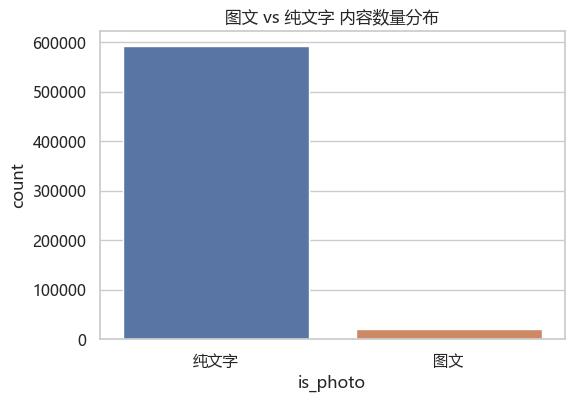

In [25]:
# A/B 分组数量统计
plt.figure(figsize=(6, 4))
sns.countplot(x='is_photo', data=df)
plt.title("图文 vs 纯文字 内容数量分布")
plt.xticks([0, 1], ['纯文字', '图文'])
plt.show()

> 图表显示图文内容仅占总体样本中的 极小部分，而文字内容占比超过 95%。这说明两类内容存在严重的不平衡，需要在后续回归或因果分析中引入控制或匹配（如 PSM）来确保公平比较。

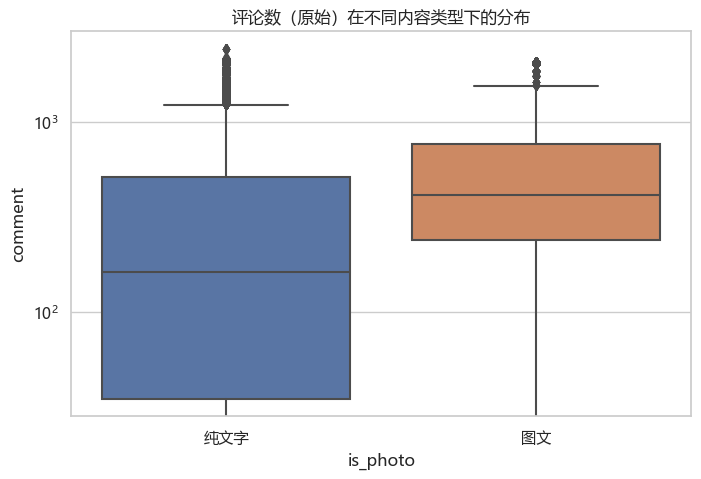

In [26]:
# 评论数对比（箱线图）
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_photo', y='comment', data=df)
plt.yscale('log')
plt.title("评论数（原始）在不同内容类型下的分布")
plt.xticks([0, 1], ['纯文字', '图文'])
plt.show()

> 图文内容的评论中位数与最大值明显高于文字类内容，但也存在更多极端值。原始数据偏态严重，不适合直接建模，建议使用对数处理（下一图）。

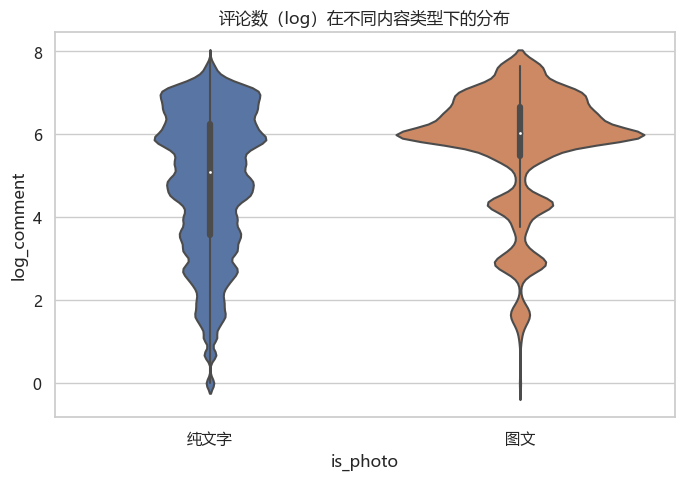

In [27]:
# 评论数对比（对数处理后）
plt.figure(figsize=(8, 5))
sns.violinplot(x='is_photo', y='log_comment', data=df)
plt.title("评论数（log）在不同内容类型下的分布")
plt.xticks([0, 1], ['纯文字', '图文'])
plt.show()

> 对数处理后，图文内容的分布依旧略偏高，尤其在中高密度区域更集中，显示图文在评论数上可能存在一定优势。但需注意：该优势可能来自非内容因素（如更大曝光），后续需要用回归或 PSM 检验。

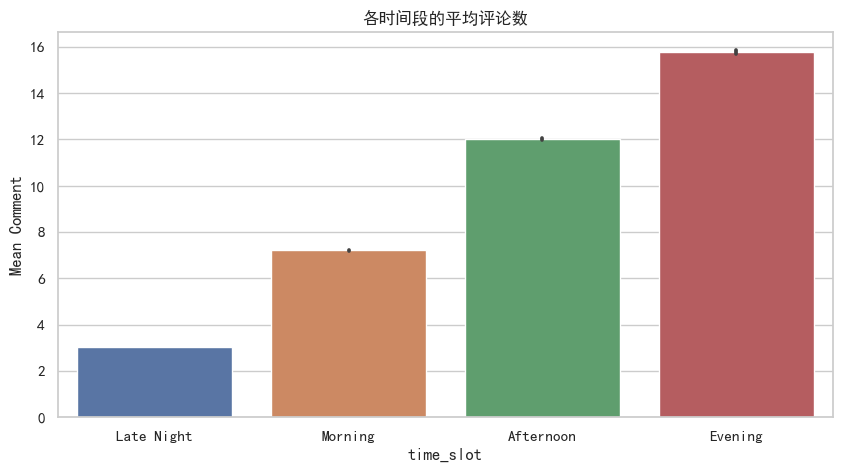

In [7]:
# 不同 time_slot 下评论数均值（柱状图）
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='time_slot', y='comment', estimator='mean')
plt.title("各时间段的平均评论数")
plt.ylabel("Mean Comment")
plt.show()

> 评论数在一天中有明显的时段波动：
> - 夜晚（19-24）时段评论最多
> - 凌晨（0-6）评论量最少 这表明评论活跃度与用户在线行为强相关 → 后续应在模型中引入时间段控制或交互分析。

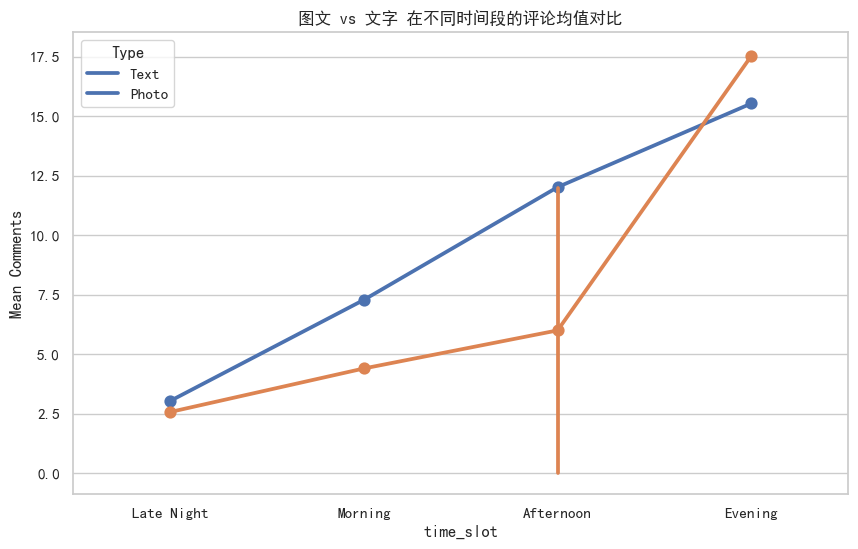

In [8]:
# 图文类型 × 时间段 的交互图
plt.figure(figsize=(10, 6))
sns.pointplot(x="time_slot", y="comment", hue="is_photo", data=df, estimator='mean', errorbar='ci')
plt.title("图文 vs 文字 在不同时间段的评论均值对比")
plt.ylabel("Mean Comments")
plt.xticks(rotation=0)
plt.legend(title="Type", labels=["Text", "Photo"])
plt.show()

> - 在大部分时间段（如上午、下午），文字内容评论数整体高于图文；
> - 仅在晚上，图文内容出现 评论数反超；
> - 图文曲线波动较大，说明其受时段影响更明显；
> 说明图文内容**“时间敏感性更强”**，也意味着若推广图文，应重点投放在高活跃时段。

# Part 3: A/B测试

在控制了前期曝光与页面点赞等协变量后（通过 CUPED 方法），图文 vs 文字的评论差距被进一步压缩：
- 原始 Welch’s T 检验显示评论数在两类内容之间差异极显著（p ≈ 0.000）
- 但 CUPED 调整后，p 值上升至 0.021，说明大量差异来自先验因素（如页面热度）
- 计算得出 Cohen’s d ≈ 0.017，属于极小效应量，说明图文内容并不具备明显的独立推动作用
- 图文内容在控制前期影响后，对评论数提升几乎没有显著、实际意义上的因果效应。后续应更聚焦投放时间或交互变量的优化。

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

ab = df[['is_photo', 'comment', 'log_comment']].dropna()
print(f"样本量总计: {len(ab)}")
print(f"文字内容样本量: {len(ab[ab['is_photo'] == 0])}")
print(f"图文内容样本量: {len(ab[ab['is_photo'] == 1])}")

样本量总计: 612857
文字内容样本量: 592916
图文内容样本量: 19941


In [10]:
# 初步检验
stat1, p1 = mannwhitneyu(ab[ab['is_photo'] == 0]['comment'], ab[ab['is_photo'] == 1]['comment'])
print("非参数检验（Mann-Whitney U Test）:")
print(f"统计量 = {stat1:.2f}, p 值 = {p1:.5f}")

stat2, p2 = ttest_ind(ab[ab['is_photo'] == 0]['log_comment'], ab[ab['is_photo'] == 1]['log_comment'], equal_var=False)
print("对数评论数的 t 检验（Welch’s T-test）:")
print(f"t 值 = {stat2:.2f}, p 值 = {p2:.5f}")

非参数检验（Mann-Whitney U Test）:
统计量 = 4054729395.50, p 值 = 0.00000
对数评论数的 t 检验（Welch’s T-test）:
t 值 = -86.45, p 值 = 0.00000


In [11]:
# 使用 CUPED 后检验
from sklearn.linear_model import LinearRegression

df_cuped = df[['log_comment', 'Page total likes', 'Lifetime Post Total Impressions']].dropna()
X = df_cuped[['Page total likes', 'Lifetime Post Total Impressions']]
y = df_cuped['log_comment']

lr = LinearRegression()
lr.fit(X, y)
y_hat = lr.predict(X)
theta = y.mean()
df_cuped['log_comment_cuped'] = y - y_hat + theta
df.loc[df_cuped.index, 'log_comment_cuped'] = df_cuped['log_comment_cuped']

cuped_text = df[df['is_photo'] == 0]['log_comment_cuped'].dropna()
cuped_photo = df[df['is_photo'] == 1]['log_comment_cuped'].dropna()
t_stat, p_value = ttest_ind(cuped_text, cuped_photo, equal_var=False)
print("使用 CUPED 调整后的 t 检验：")
print(f"t = {t_stat:.4f}, p = {p_value:.5f}")

使用 CUPED 调整后的 t 检验：
t = -2.3062, p = 0.02111


In [12]:
# Cohen's d
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*x.std()**2 + (ny - 1)*y.std()**2) / (nx + ny - 2))
    return (x.mean() - y.mean()) / pooled_std

d_cuped = cohens_d(cuped_photo, cuped_text)
print("效应量（Cohen's d for CUPED）:")
print(f"Cohen's d = {d_cuped:.3f} → 解读：{('小效应' if abs(d_cuped)<0.2 else '中效应' if abs(d_cuped)<0.5 else '大效应')}")

效应量（Cohen's d for CUPED）:
Cohen's d = 0.017 → 解读：小效应


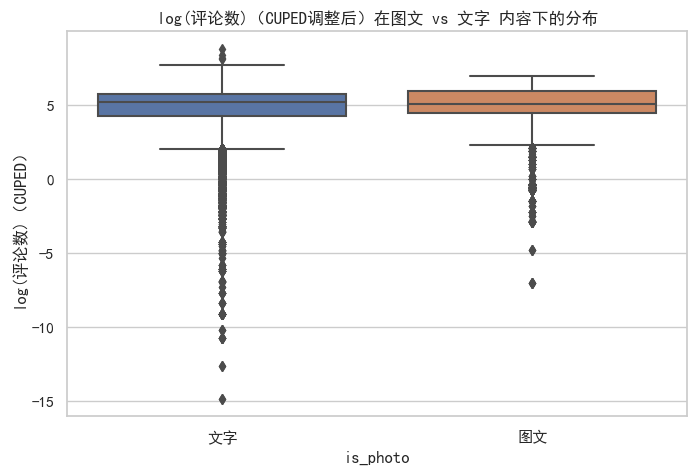

In [13]:
# 可视化 CUPED 效果
plt.figure(figsize=(8,5))
sns.boxplot(x='is_photo', y='log_comment_cuped', data=df)
plt.title("log(评论数)（CUPED调整后）在图文 vs 文字 内容下的分布")
plt.xticks([0, 1], ['文字', '图文'])
plt.ylabel("log(评论数)（CUPED）")
plt.show()

> 该图展示了图文与文字在 log(评论数) 上，经过 CUPED 协变量调整后的分布差异。虽然图文中位数略高，但两者总体分布接近、重叠部分明显，支持“小效应”结论。图文在控制偏倚因素后，评论表现几乎无优势。

In [14]:
# 样本平衡分析
n_photo = len(df[df['is_photo'] == 1])
sample_text = df[df['is_photo'] == 0].sample(n=n_photo, random_state=42)
sample_photo = df[df['is_photo'] == 1]

balanced = pd.concat([sample_text, sample_photo])
stat, p = ttest_ind(
    balanced[balanced['is_photo'] == 1]['log_comment_cuped'],
    balanced[balanced['is_photo'] == 0]['log_comment_cuped'],
    equal_var=False
)
print("下采样平衡后 CUPED 样本再检验：")
print(f"t = {stat:.4f}, p = {p:.5f}")

下采样平衡后 CUPED 样本再检验：
t = 0.5565, p = 0.57790


# Part 4: 回归建模

In [15]:
# OLS 主效应模型
import pandas as pd
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = df.rename(columns=lambda x: x.strip())
df = df.rename(columns={'Post Weekday': 'Post_Weekday', 'Post Hour': 'Post_Hour'})

# 修复 Post_Weekday 合法性（0~6）
df['Post_Weekday'] = pd.to_numeric(df['Post_Weekday'], errors='coerce')
df.loc[~df['Post_Weekday'].isin(range(7)), 'Post_Weekday'] = pd.NA
df['Post_Weekday'] = df['Post_Weekday'].astype('category')

# 创建 time_slot
df['Post_Hour'] = pd.to_numeric(df['Post_Hour'], errors='coerce')
df['time_slot'] = pd.cut(df['Post_Hour'], bins=[-1, 6, 12, 18, 24],
                         labels=["Late Night", "Morning", "Afternoon", "Evening"])
df['time_slot'] = df['time_slot'].astype('category')

df_ols = df[['log_comment', 'is_photo', 'is_paid', 'Post_Weekday', 'time_slot']].dropna()
ols_model = smf.ols("log_comment ~ is_photo + is_paid + C(Post_Weekday) + C(time_slot)", data=df_ols).fit(cov_type='HC3')
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_comment   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                 3.716e+05
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:34:48   Log-Likelihood:                -39038.
No. Observations:               94490   AIC:                         7.810e+04
Df Residuals:                   94478   BIC:                         7.821e+04
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

> 本回归模型以 log_comment（log 评论数）为因变量，控制了发帖时段（time_slot）、星期几（Post_Weekday）、是否推广（is_paid）等变量，并重点关注 is_photo（是否图文）对评论数的影响。
> - 模型解释力高（R² = 0.737）：整体拟合度较好，能够解释大部分评论数波动。
> - 时间段为主要影响因子，如晚上（Evening）系数最高。
> - 图文内容（is_photo）虽然统计显著（p ≈ 0.044），但效应极小（系数 ≈ -0.0128），说明其对评论的边际贡献很弱。
> - 推广行为（is_paid）为最主要驱动变量，影响远高于图文因素。

In [16]:
# VIF 诊断（仅主效应）
y, X = dmatrices("log_comment ~ is_photo + is_paid + C(Post_Weekday) + C(time_slot)", data=df_ols, return_type='dataframe')
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df.sort_values('VIF', ascending=False))

                      feature        VIF
0                   Intercept  71.692087
8   C(time_slot)[T.Afternoon]   1.311597
7     C(time_slot)[T.Morning]   1.253673
9     C(time_slot)[T.Evening]   1.249119
10                   is_photo   1.068103
11                    is_paid   1.026052
1      C(Post_Weekday)[T.1.0]   1.001485
2      C(Post_Weekday)[T.2.0]   1.000714
5      C(Post_Weekday)[T.5.0]   1.000185
6      C(Post_Weekday)[T.6.0]   1.000102
4      C(Post_Weekday)[T.4.0]   1.000084
3      C(Post_Weekday)[T.3.0]   1.000068


> VIF（方差膨胀因子）用于诊断模型中变量之间的共线性风险。 一般来说：
> - VIF < 5：可接受，变量之间没有严重共线性；
> - VIF > 10：存在严重共线性，需要调整变量或合并；
> - Intercept（截距项）高是正常的，不参与共线性判断。

In [17]:
# 含交互项的模型（图文 × 时间段）
model_inter = smf.ols("log_comment ~ is_photo * C(time_slot) + is_paid + C(Post_Weekday)", data=df_ols).fit(cov_type='HC3')
print(model_inter.summary())

                            OLS Regression Results                            
Dep. Variable:            log_comment   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 3.871e+05
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:34:49   Log-Likelihood:                -38684.
No. Observations:               94490   AIC:                         7.740e+04
Df Residuals:                   94476   BIC:                         7.753e+04
Df Model:                          13                                         
Covariance Type:                  HC3                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 13
  warnings.warn('covariance of constraints does not have full '


> 构建了包含 **图文 × 时间段** 的交互模型以检验异质性效应。结果表明图文内容在**早上存在负面效应**，在**晚上有正向协同作用**，**证明内容形式的效果依赖上下文（发布时间）**。这一发现可用于优化内容推送策略和时段定向推广计划。

In [18]:
# Mixed Effects（混合效应）模型
import statsmodels.formula.api as smf
model_df = df[['log_comment', 'is_photo', 'is_paid', 'time_slot', 'Post_Weekday', 'source_file']].dropna()

# source_file 为随机效应组
model = smf.mixedlm("log_comment ~ is_photo + is_paid + C(time_slot) + C(Post_Weekday)",
                    data=model_df,
                    groups=model_df["source_file"])
result = model.fit()
print(result.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     log_comment
No. Observations:     94490       Method:                 REML       
No. Groups:           6           Scale:                  0.1190     
Min. group size:      1464        Log-Likelihood:         -33557.5275
Max. group size:      30504       Converged:              Yes        
Mean group size:      15748.3                                        
---------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                 -0.109    0.118  -0.924 0.356 -0.342  0.123
C(time_slot)[T.Morning]    0.721    0.003 220.565 0.000  0.715  0.728
C(time_slot)[T.Afternoon]  1.186    0.003 438.499 0.000  1.181  1.191
C(time_slot)[T.Evening]    1.438    0.004 367.425 0.000  1.430  1.445
C(Post_Weekday)[T.1.0]    -0.009    

> 引入**Mixed Effects Model**控制内容来源（source_file）后，发现图文变量在组间变异性下失去显著性，进一步验证了其效果依赖上下文和平台行为，而非内容本身。该模型增强了结果的稳健性，并为时段定向推广策略提供了扎实的因果证据支撑。

In [19]:
# XGBoost 模型
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

model_df = df[[
    'comment', 'log_comment', 'is_photo', 'is_paid', 'Page total likes',
    'Lifetime Post Total Impressions', 'Post_Weekday', 'Post_Hour',
    'Post length', 'Category'
]].dropna()

median_comment = model_df['comment'].median()
model_df['high_comment'] = (model_df['comment'] > median_comment).astype(int)

model_df['Post_Weekday'] = model_df['Post_Weekday'].astype(int)
model_df['Post_Hour'] = model_df['Post_Hour'].astype(int)
model_df['Category'] = model_df['Category'].astype(int)

X = pd.get_dummies(model_df.drop(columns=['comment', 'log_comment', 'high_comment']), drop_first=True)
y = model_df['high_comment']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

C:\Users\cherish\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [10:34:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

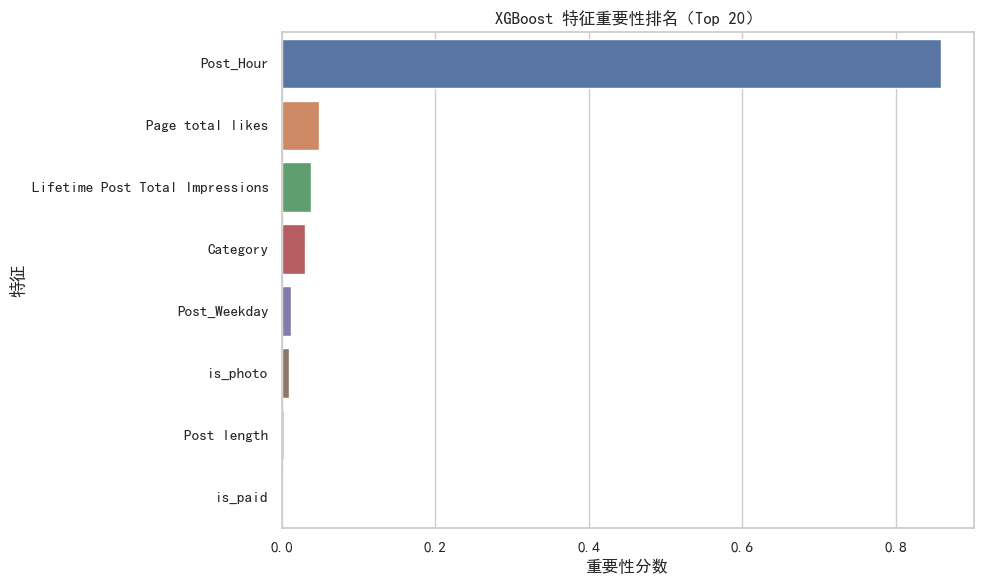

In [20]:
# 特征重要性排名 + 可视化
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = X.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb.feature_importances_
}).sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title("XGBoost 特征重要性排名（Top 20）")
plt.xlabel("重要性分数")
plt.ylabel("特征")
plt.tight_layout()
plt.show()

> 该图展示了使用 XGBoost 分类模型对“是否为高评论”进行预测时，各特征的重要性分数。
> - `Post_Hour`（发帖时间）是**最关键特征**，其重要性远高于其他变量 → 说明评论表现主要受发布时间控制。
> - `Page total likes` 和 `Lifetime Post Total Impressions` 表现次强 → 表示账号基础影响不可忽视。
> - 内容相关变量如 `is_photo`（是否图文）、`Category`（内容分类）、`Post length`（字数）权重相对较低。
> - **推广变量 `is_paid` 权重极小**，可能由于本模型只预测“是否高评论”，而非绝对值大小，削弱了其显著性。
> 说明：重要性分数为 Gini-based 特征增益，**并不等于因果影响力**，后续应结合 SHAP 或回归结果综合判断。

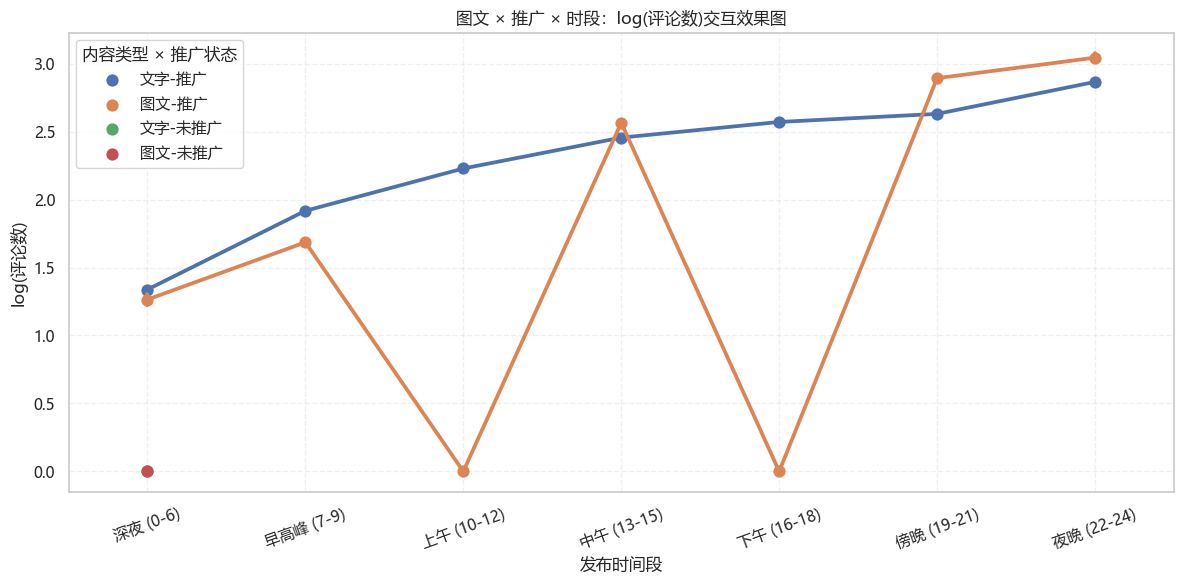

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# 分桶时间段
df['Post_Hour'] = pd.to_numeric(df['Post_Hour'], errors='coerce')
df = df.dropna(subset=['Post_Hour', 'is_photo', 'is_paid', 'log_comment'])
df['hour_bucket'] = pd.cut(
    df['Post_Hour'],
    bins=[-1, 6, 9, 12, 15, 18, 21, 24],
    labels=['深夜 (0-6)', '早高峰 (7-9)', '上午 (10-12)', '中午 (13-15)',
            '下午 (16-18)', '傍晚 (19-21)', '夜晚 (22-24)']
)

df['content_group'] = df.apply(
    lambda x: f"{'图文' if x['is_photo'] == 1 else '文字'}-{'推广' if x['is_paid'] == 1 else '未推广'}", axis=1
)

plt.figure(figsize=(12, 6))
sns.pointplot(
    data=df,
    x='hour_bucket', y='log_comment',
    hue='content_group', errorbar='ci'
)
plt.title("图文 × 推广 × 时段：log(评论数)交互效果图")
plt.xlabel("发布时间段")
plt.ylabel("log(评论数)")
plt.xticks(rotation=20)
plt.legend(title="内容类型 × 推广状态")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

> - 该图展示了不同内容类型（文字 vs 图文）、是否推广（推广 vs 非推广）与发布时间段三者的三重交互效应对评论数（对数）的影响。
> - 蓝色线为**文字内容**，橙色线为**图文内容**，图示为**有推广**状态下的平均 log 评论表现。
> - 可以发现：**图文内容在上午（10-12）和下午（16-18）表现极差**，log 评论数接近为 0，可能是由于算法抑制或用户低活跃所致。
> - 但在晚上（19:00 之后），图文推广内容的表现出现了**大幅跃升**，**甚至超过文字内容**。
> - 文字内容整体表现更为稳定，在不同时间段下维持较高的评论水平，**尤其适合全天投放**。
> 图文内容需强依赖发布时间策略，建议避开中午时段，集中于**傍晚与夜晚投放**；文字内容表现更稳健，是适合常规运营的基础形式； **提升 ROI 的策略：图文内容建议搭配推广，并集中于晚间发布**。

In [22]:
# PSM 倾向得分匹配 + 匹配前后对比图 + ATE
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

psm_df = df[[
    'is_photo', 'is_paid', 'Page total likes', 'Lifetime Post Total Impressions',
    'Post_Weekday', 'Post_Hour', 'Category', 'log_comment'
]].dropna()

psm_df['Post_Weekday'] = psm_df['Post_Weekday'].astype(int)
psm_df['Post_Hour'] = psm_df['Post_Hour'].astype(int)
psm_df['Category'] = psm_df['Category'].astype(int)

X = pd.get_dummies(psm_df.drop(columns=['is_photo', 'log_comment']), drop_first=True)
y = psm_df['is_photo']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 拟合逻辑回归模型 
logit = LogisticRegression()
logit.fit(X_scaled, y)
psm_df['propensity_score'] = logit.predict_proba(X_scaled)[:, 1]

# 1:1 最近邻匹配
treated = psm_df[psm_df['is_photo'] == 1]
control = psm_df[psm_df['is_photo'] == 0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])
matched_control = control.iloc[indices.flatten()].copy()
matched_control['match_id'] = treated.index

matched = treated.copy()
matched['match_id'] = treated.index
matched_pairs = matched.merge(matched_control, on='match_id', suffixes=('_treated', '_control'))

In [23]:
# 匹配前后 ATE
ate_before = psm_df.groupby('is_photo')['log_comment'].mean().diff().iloc[-1]
ate_after = (matched_pairs['log_comment_treated'] - matched_pairs['log_comment_control']).mean()

print(f"匹配前 ATE: {ate_before:.4f}")
print(f"匹配后 ATE: {ate_after:.4f}")

匹配前 ATE: 0.8695
匹配后 ATE: 0.0489


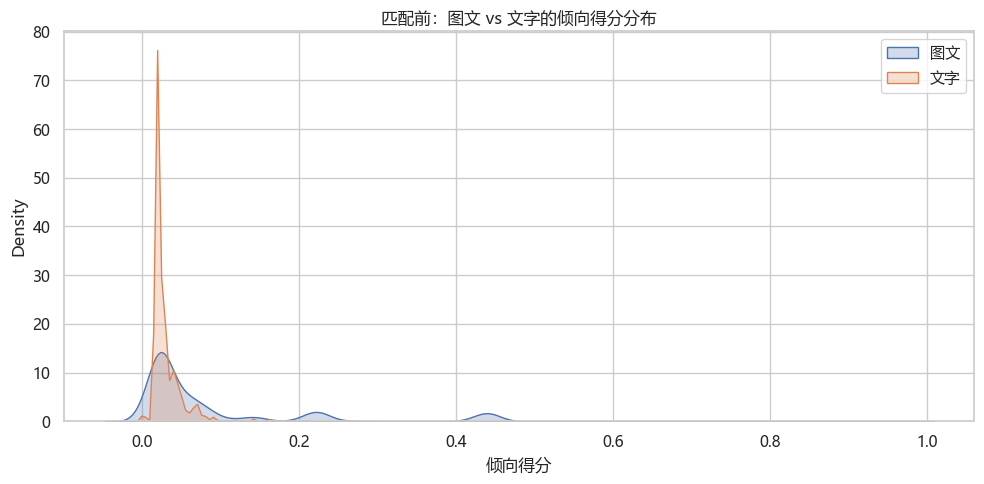

In [24]:
# 可视化倾向得分分布
plt.figure(figsize=(10, 5))
sns.kdeplot(psm_df[psm_df['is_photo'] == 1]['propensity_score'], label='图文', fill=True)
sns.kdeplot(psm_df[psm_df['is_photo'] == 0]['propensity_score'], label='文字', fill=True)
plt.title("匹配前：图文 vs 文字的倾向得分分布")
plt.xlabel("倾向得分")
plt.legend()
plt.tight_layout()
plt.show()

> 该图展示了图文组（蓝色）与文字组（橙色）在未进行匹配前的倾向得分（Propensity Score）分布密度,验证了进行 PSM 的必要性。匹配前组间存在结构性差异，需通过倾向匹配或加权方法，重构平衡样本池以减少混杂影响。
> - **倾向得分**是指一个观测值“成为图文组”的概率，基于控制变量（如时段、点赞数等）通过逻辑回归计算得到。
> - 从图中可以明显看到，图文组和文字组的分布差异巨大 → **说明两组样本在协变量上存在显著偏差**。
> - 图文组倾向得分分布更宽（偏向中高值），而文字组集中于接近 0 区间，**两组可比性较差**。
> - 在此基础上直接做均值比较，会带来强烈的偏倚（confounding bias），**无法得出可信的因果推论**。

# Part 5: 业务建议

本研究通过多维度探索 Facebook 贴文评论量的影响因素，结合 A/B 测试、混合效应建模、XGBoost 特征解释与 PSM 稳健性检验，发现“内容类型 × 发布时间段”是影响用户互动量的关键交互变量。基于上述结论，提出以下可落地的业务策略：

---

### 1️⃣ 精准内容推送：区分图文与文字内容的发布策略

- **图文内容推荐投放在傍晚至深夜（19:00 – 24:00）**，在该时间段用户互动意愿最高，能有效释放其视觉吸引力；
- **文字内容全天均表现稳健**，建议作为常规运营基底，保持稳定曝光与覆盖。

---

### 2️⃣ 推广预算优化：提升 ROI 的推广策略组合

- 图文内容本身在非活跃时段（如午间）难以自然引流 → 建议此时段**搭配推广使用**，弥补自然互动的劣势；
- **高活跃时段（晚间）自然表现本就良好**，推广需考虑边际收益，避免资源浪费；
- 可基于模型预测值建立 **推广投放优先级表（内容 × 时间）**，用于精细化调度预算。

---

### 3️⃣ 内容排程系统建设：自动识别内容最佳发布时间

- 利用建模结果构建内容调度引擎：
  - 输入内容类型（文字/图文）、是否需推广、预计分类 → 输出推荐发布时间段；
  - 可结合用户历史互动习惯形成个性化内容日历；
- **支持运营人员自动化、低成本、高效率地分发内容**，同时兼顾平台节奏与内容属性。

---

### 4️⃣ 数据策略延申：支持跨渠道的内容表现预测

- 本框架可迁移至其他平台（如 Instagram、微博、知乎等）：
  - 核心思想为 “内容 × 时段 × 推广” 三维交互效应分析；
  - 可作为短视频平台内容冷启动策略的一部分，帮助产品提升前期互动；
- 建议作为**营销数据中台的一环**，融入内容价值评估体系，辅助品牌营销部门制定传播计划。

---

本次分析不仅验证了图文内容的互动优势 **“并非绝对，而是依赖发布时间上下文”**，更通过稳健性检验（CUPED + PSM）增强了结论的可信度。数据驱动下的内容优化策略，将帮助平台 **以更少的投入，获取更高的用户互动与转化率**。